In [ ]:
pip install scipy==1.11.4

In [1]:
import pickle
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout, Input
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
train_path = 'EmotionDatasetNLP/train.txt'
test_path = 'EmotionDatasetNLP/test.txt'
val_path = 'EmotionDatasetNLP/val.txt'

In [3]:
df_train = pd.read_csv(train_path, header=None, sep=';', names=['Text', 'Emotion'], encoding='utf-8')
df_test = pd.read_csv(test_path, header=None, sep=';', names=['Text', 'Emotion'], encoding='utf-8')
df_val = pd.read_csv(val_path, header=None, sep=';', names=['Text', 'Emotion'], encoding='utf-8')

In [4]:
tokenizer = Tokenizer(num_words=15212, lower=True, oov_token='UNK')
tokenizer.fit_on_texts(df_train['Text'])

In [5]:
X_train_seq = tokenizer.texts_to_sequences(df_train['Text'])
X_train_pad = pad_sequences(X_train_seq, maxlen=80, padding='post')

In [6]:
X_val_seq = tokenizer.texts_to_sequences(df_val['Text'])
X_val_pad = pad_sequences(X_val_seq, maxlen=80, padding='post')

In [7]:
X_test_seq = tokenizer.texts_to_sequences(df_test['Text'])
X_test_pad = pad_sequences(X_test_seq, maxlen=80, padding='post')

In [8]:
label_map = {'joy': 0, 'anger': 1, 'love': 2, 'sadness': 3, 'fear': 4, 'surprise': 5}
df_train['Emotion'] = df_train['Emotion'].map(label_map)
df_val['Emotion'] = df_val['Emotion'].map(label_map)
df_test['Emotion'] = df_test['Emotion'].map(label_map)

In [9]:
Y_train = to_categorical(df_train['Emotion'])
Y_val = to_categorical(df_val['Emotion'])
Y_test = to_categorical(df_test['Emotion'])

In [10]:
model = Sequential()
model.add(Input(shape=(80,)))
model.add(Embedding(15212, 64, input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80, return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6, activation='softmax'))

d:\fyp1\ReactDjango4\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
hist = model.fit(X_train_pad, Y_train, epochs=12, validation_data=(X_val_pad, Y_val))

Epoch 1/12
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 62ms/step - accuracy: 0.3980 - loss: 1.4798 - val_accuracy: 0.7630 - val_loss: 0.6488
Epoch 2/12
500/500 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.8018 - loss: 0.5535 - val_accuracy: 0.9050 - val_loss: 0.2683
Epoch 3/12
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.9037 - loss: 0.2779 - val_accuracy: 0.9115 - val_loss: 0.2237
Epoch 4/12
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.9253 - loss: 0.2016 - val_accuracy: 0.9240 - val_loss: 0.1859
Epoch 5/12
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.9436 - loss: 0.1474 - val_accuracy: 0.9230 - val_loss: 0.1859
Epoch 6/12
500/500 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.9539 - loss: 0.1206 - val_accuracy: 0.9315 - val_loss: 0.1798
Epoch 7/12
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.9568 - loss: 0.1082 - val_accuracy: 0.9365 - val_loss: 0.1538
Epoch 8/12
500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.9673 - loss: 0.0872 - 

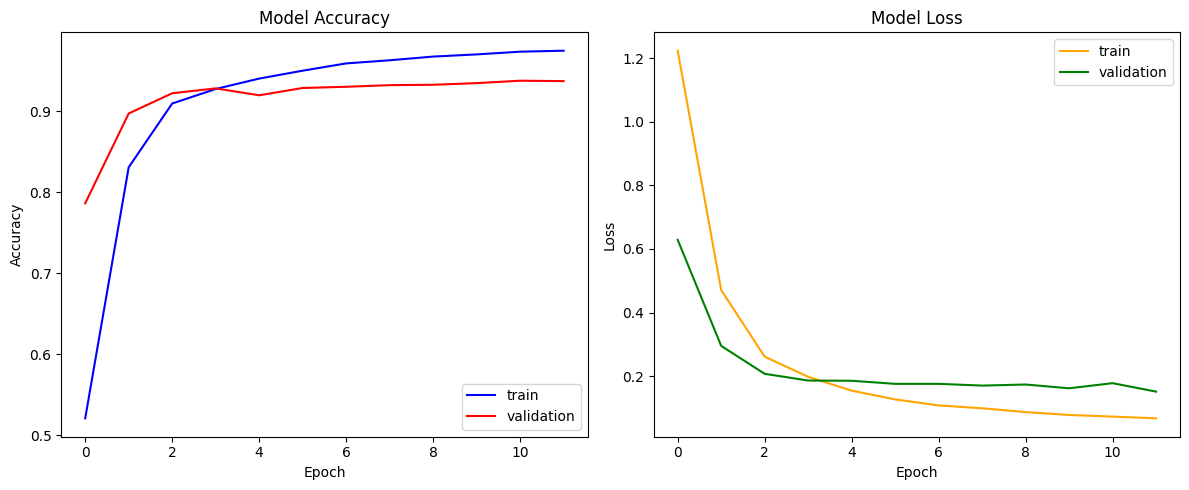

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(hist.history['accuracy'], c='b', label='train')
axs[0].plot(hist.history['val_accuracy'], c='r', label='validation')
axs[0].legend(loc='lower right')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')

axs[1].plot(hist.history['loss'], c='orange', label='train')
axs[1].plot(hist.history['val_loss'], c='g', label='validation')
axs[1].legend(loc='upper right')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [29]:
model.evaluate(X_test_pad, Y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9263 - loss: 0.1756


[0.17241862416267395, 0.9315000176429749]

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


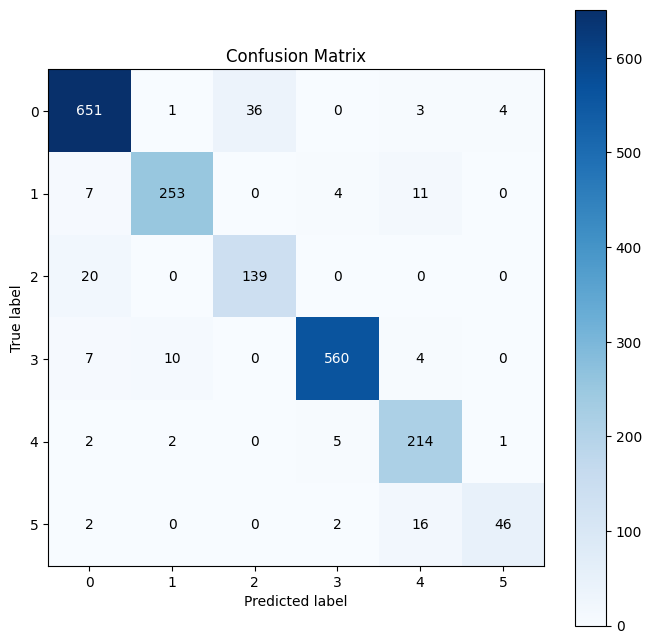

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       695
           1       0.95      0.92      0.94       275
           2       0.79      0.87      0.83       159
           3       0.98      0.96      0.97       581
           4       0.86      0.96      0.91       224
           5       0.90      0.70      0.79        66

    accuracy                           0.93      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.93      0.93      0.93      2000



In [30]:
Y_pred_prob = model.predict(X_test_pad)
Y_pred = np.argmax(Y_pred_prob, axis=1)

skplt.metrics.plot_confusion_matrix(df_test['Emotion'], Y_pred, figsize=(8, 8))
plt.show()

print(classification_report(df_test['Emotion'], Y_pred))

In [17]:
model.save('emotion1.h5')
print('model saved')

model saved


In [13]:
with open('Emotiontokenizer.pickle1', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
def get_key(value):
    dictionary = {'joy': 0, 'anger': 1, 'love': 2, 'sadness': 3, 'fear': 4, 'surprise': 5}
    for key, val in dictionary.items():
        if val == value:
            return key

In [15]:
def predictEmotion(sentence):
    sentence_seq = tokenizer.texts_to_sequences([sentence])
    sentence_pad = pad_sequences(sentence_seq, maxlen=80, padding='post')
    pred_prob = model.predict(sentence_pad)
    pred_class = np.argmax(pred_prob, axis=1)
    emotion_map = {0: 'joy', 1: 'anger', 2: 'love', 3: 'sadness', 4: 'fear', 5: 'surprise'}
    return emotion_map[pred_class[0]]

In [16]:
input_sentence = input('Enter a sentence: ')
predicted_sentiment = predictEmotion(input_sentence)
print(f'The predicted sentiment is: {predicted_sentiment}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
The predicted sentiment is: joy
